# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [3]:
# Check for nulls
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [4]:
df = df.drop('Unnamed: 32', axis=1)
df.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

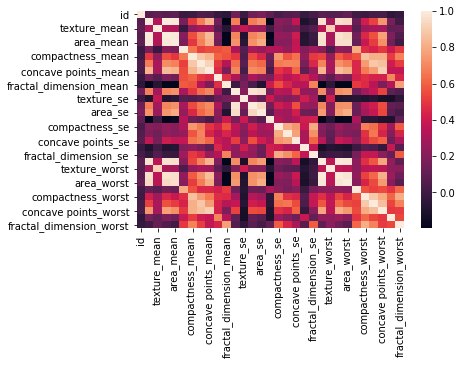

In [5]:
# See if anything jumps out of the correlation heatmap
import seaborn as sns
sns.heatmap(df.corr(), robust=True);

Too many squares for me to learn anything super useful. Data looks to be grouped by [texture, area, compactness, concave_points, and fractal_dimension], each having a [mean, se, and worst] category. I don't see perimeter, smoothness, or a few others in the plot, but it looks like at least 10 groups to work with from the get-go.

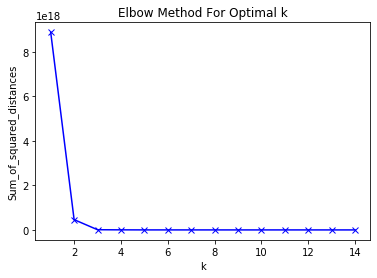

In [6]:
# Make an elbow plot with the help of code from the lecture notebook
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Looks like 3 is all we really need, nice.

In [7]:
# Well, I haven't standardized the data yet,
# so maybe I'm getting ahead of myself.
df.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
# Traveling through time and using code from my sprint challenge / lecture notebook
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_df_as_np_array = scaler.fit_transform(df)
standardized_df_as_np_array

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

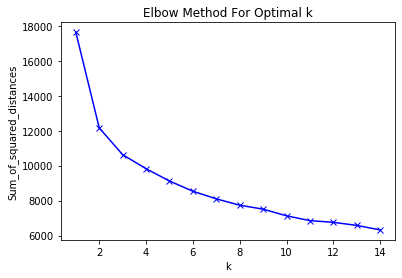

In [9]:
# Check the elbow graph again
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(standardized_df_as_np_array.copy())
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

That looks considerably more realistic.

In [10]:
# Back to clustering (more sprint challenge code)

# listen to the elbow plot, use 14 clusters
# random state is set so this result stays constant across runs
copy_df = standardized_df_as_np_array.copy()
kmeans = KMeans(n_clusters=14, random_state=0).fit(copy_df)

# stick that data in a dataframe
cancer_df = pd.DataFrame(copy_df)

# the labels in our kmeans object are ordered the same way
# as the input data, so they can go right on into the df
cancer_df['label'] = kmeans.labels_

cancer_df['label']

0      13
1       5
2       5
3       2
4       3
       ..
564     3
565     3
566     8
567    13
568    12
Name: label, Length: 569, dtype: int32

In [11]:
# Just remembered that we only care about whether
# a cell is malignant or not.

# forget the elbow plot, hope that n=2 maps to malignant y/n
copy_df = standardized_df_as_np_array.copy()
kmeans = KMeans(n_clusters=2, random_state=0).fit(copy_df)

# stick that data in a dataframe
cancer_df2 = pd.DataFrame(copy_df)

# the labels in our kmeans object are ordered the same way
# as the input data, so they can go right on into the df
cancer_df2['label'] = kmeans.labels_

cancer_df2.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,label
398,-0.235909,-0.871154,-1.037790,-0.892140,-0.786932,-1.348605,-1.073809,-0.774382,-1.074916,-1.009919,-0.093223,-0.792843,-0.959341,-0.793563,-0.601903,-0.927364,-0.602944,-0.414254,-1.237358,-1.045186,-0.097552,-0.743259,-0.867505,-0.788467,-0.674833,-0.892875,-0.422174,-0.308426,-0.899073,-0.502735,0.423054,1
44,0.442450,-0.271884,0.586503,-0.269756,-0.350931,0.055489,0.006804,-0.077958,0.092880,-0.239570,-0.145674,-0.762886,-1.096868,-0.758416,-0.568680,-1.230376,-0.650450,-0.576061,-0.801825,-1.139627,-0.784835,-0.008116,0.686025,-0.052459,-0.245902,0.786039,0.866009,0.482686,0.701851,1.281677,0.677967,1
160,-0.173406,-0.675185,0.207191,-0.653649,-0.668618,0.892395,0.184948,-0.255736,-0.297641,0.662213,0.245584,0.348751,0.863894,0.524703,-0.043939,0.797373,-0.079818,0.324152,-0.044792,1.625806,0.478903,-0.610726,0.086759,-0.546606,-0.591860,0.150419,-0.413905,-0.367435,-0.540791,0.432343,-0.225865,1
110,-0.236231,-1.235545,-0.535144,-1.213835,-1.037213,0.522334,-0.384734,-0.570740,-0.803203,-0.831023,1.113158,-0.007839,0.375835,-0.058938,-0.384306,2.269766,0.214720,-0.154967,-0.254043,1.485355,0.318902,-1.080803,-0.685120,-1.059816,-0.902834,0.628230,-0.494694,-0.682153,-0.932876,-0.594948,0.040685,1
416,-0.235895,-1.341198,0.560905,-1.333287,-1.091251,0.572150,-0.810194,-0.857873,-0.937589,0.779043,0.455390,0.090331,3.013891,-0.052998,-0.333702,2.566444,-0.488371,-0.604244,-0.506441,1.198399,0.300746,-1.122220,0.905864,-1.147684,-0.916194,0.886862,-0.858566,-1.011215,-1.171020,-0.046520,-0.050197,1
390,0.479907,-1.098366,-1.645155,-1.079967,-0.947908,0.256176,-0.548095,-0.873441,-0.754194,-0.042419,0.410026,-0.772631,-1.214074,-0.751486,-0.626104,-0.453011,-0.661069,-0.775799,-0.789497,-0.140729,-0.538594,-1.012466,-1.632871,-1.013648,-0.854492,0.084665,-0.567850,-0.892524,-0.725490,0.058635,-0.372717,1
317,-0.235989,1.162387,-0.097655,1.101054,1.058322,0.078262,0.139464,0.303839,0.788802,-0.016862,-0.872905,-0.003869,-1.209357,-0.157944,0.188399,-0.740023,-0.496754,-0.259080,-0.059391,-0.943480,-0.508333,1.153617,-0.110282,1.001959,1.062512,0.483572,0.140173,0.542655,0.959181,-0.143587,-0.108937,0
257,-0.236049,0.338746,-0.469986,0.462606,0.166127,2.643065,2.351102,1.958584,1.941793,2.140845,1.865906,0.916840,-0.286400,0.591532,0.420737,1.036382,1.140251,0.594714,1.536752,-0.206112,1.840229,0.302508,-0.491336,0.373478,0.084761,1.934540,1.247056,0.818993,1.648946,0.577943,1.948098,0
300,-0.236004,1.534446,-0.090674,1.545908,1.598701,1.326504,1.134417,1.643454,1.477501,-0.071627,0.385927,2.547481,-0.101337,2.163749,2.038743,-0.328340,0.366181,0.811892,0.897646,-0.206112,0.375262,2.000585,0.091645,1.901492,2.061007,0.750970,1.000870,1.630733,1.269803,0.108787,0.850310,0
546,-0.235763,-1.081325,-0.684076,-1.098091,-0.938523,-0.143774,-1.030979,-0.987817,-1.120082,0.267911,-0.111652,-0.702973,-0.453320,-0.747526,-0.602123,0.015008,-1.018930,-0.721952,-1.022105,-0.598406,-0.449704,-1.039387,-0.636267,-1.076496,-0.871368,-0.169583,-1.055006,-1.095507,-1.382518,-0.355517,-0.551710,1


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# add the original diagnosis column to the data
og_df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")

cancer_df2['og_diagnosis'] = og_df['diagnosis']

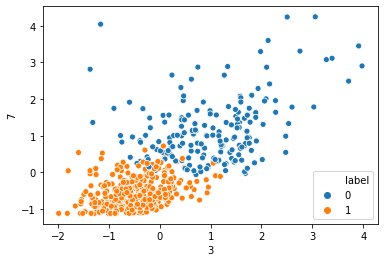

In [13]:
# scatter the data across two random columns, colored by label
sns.scatterplot(x=3, y=7, hue='label', data=cancer_df2);

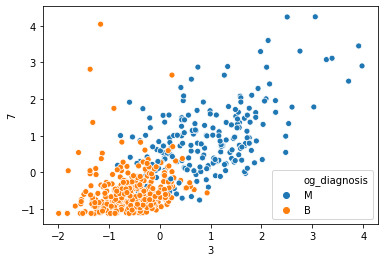

In [14]:
# This time colored by the original diagnosis
sns.scatterplot(x=3, y=7, hue='og_diagnosis', data=cancer_df2);

A heck of a lot closer than I expected.

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [15]:
# more pre-made code
from sklearn.decomposition import PCA

# 2 components to start
my_pca = PCA(2)
pca_features = my_pca.fit_transform(standardized_df_as_np_array.copy())
pca_features

array([[ 9.18319983,  1.97127137],
       [ 2.38329766, -3.75345877],
       [ 5.74247239, -1.08035048],
       ...,
       [ 1.2518901 , -1.89397674],
       [10.36503528,  1.69639755],
       [-5.47826365, -0.67278804]])

In [16]:
pca_df = pd.DataFrame(pca_features)
pca_df.head()

,0,1
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689


In [0]:
# cancer_df3 = pd.DataFrame(standardized_df_as_np_array.copy())

# cancer_df3['feature1'] = pca_df.iloc[:, 0]
# cancer_df3['feature2'] = pca_df.iloc[:, 1]
# cancer_df3.sample(10)

In [18]:
# too lazy to make a function this late in the game
copy_df = pca_df.copy()
kmeans = KMeans(n_clusters=2, random_state=0).fit(copy_df)

# stick that data in a dataframe
cancer_df3 = pd.DataFrame(copy_df)

# the labels in our kmeans object are ordered the same way
# as the input data, so they can go right on into the df
cancer_df3['label'] = kmeans.labels_

cancer_df3.sample(10)

,0,1,label
4,3.945694,-1.959689,1
392,4.142024,0.781630,1
245,-2.285982,2.075634,0
196,2.492173,2.283997,1
94,2.769390,0.569859,1
487,4.747985,-1.471132,1
157,-0.753736,-3.065453,0
185,-3.893046,0.815066,0
173,-3.488216,1.616708,0
330,1.779431,-0.254705,1


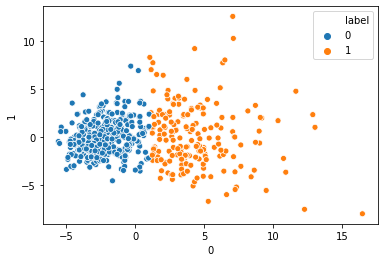

In [19]:
sns.scatterplot(x=0, y=1, hue='label', data=cancer_df3);

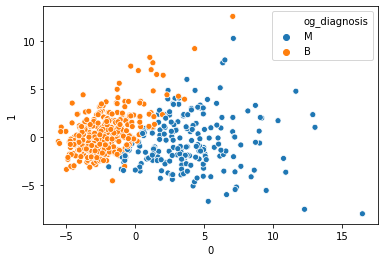

In [20]:
# add the original diagnosis again
cancer_df3['og_diagnosis'] = og_df['diagnosis']
sns.scatterplot(x=0, y=1, hue='og_diagnosis', data=cancer_df3);

Again, not too shabby. Just flip the one's and zero's.

In [0]:
# but not like this

# cancer_df3['labels'].apply({1:0, 0:1})
# sns.scatterplot(x=0, y=1, hue='label', data=cancer_df3);

In [0]:
# (ty lecture notebook)

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''

    # The underlying number values of the graph
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    cumvals = np.cumsum(vals)
 
    # fun with matplotlib
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)

    # annotate each component
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    # more fun with pyplot
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

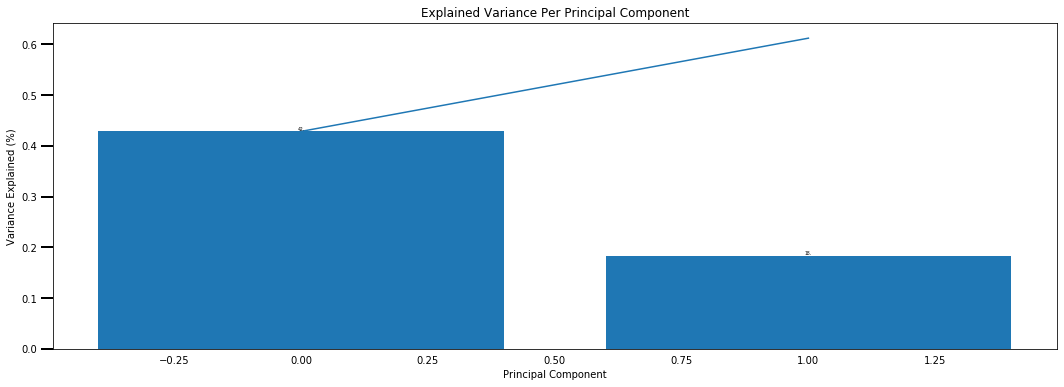

In [23]:
scree_plot(my_pca)

In [0]:
# We got what we needed anyway, on to more pca
my_pca2 = PCA(14)
pca_features2 = my_pca2.fit_transform(standardized_df_as_np_array.copy())

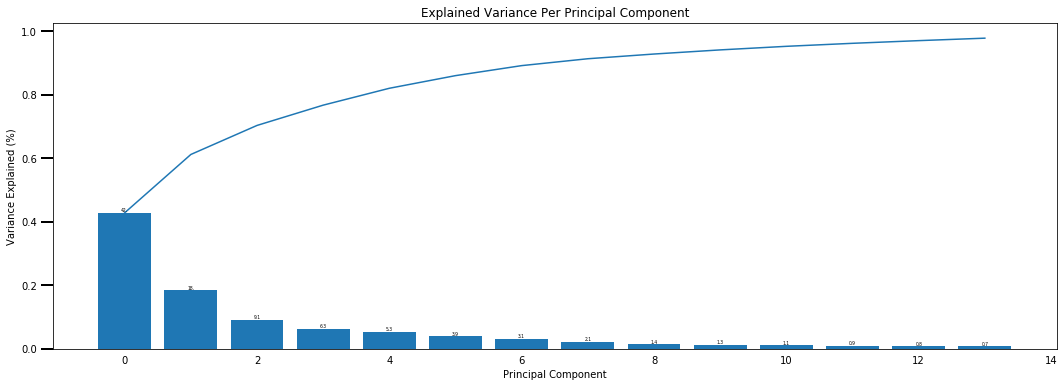

In [25]:
scree_plot(my_pca2)

14 components are keeping the variance above 90%

In [0]:
pca_df2 = pd.DataFrame(pca_features2)

In [0]:
# hello old friend
copy_df = pca_df2.copy()
kmeans = KMeans(n_clusters=2, random_state=0).fit(copy_df)

cancer_df4 = pd.DataFrame(copy_df)

cancer_df4['label'] = kmeans.labels_

In [0]:
cancer_df4['og_diagnosis'] = og_df['diagnosis']

In [29]:
cancer_df4['og_diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [0]:
cancer_df4['og_diagnosis'] = cancer_df4['og_diagnosis'].map({'M':1, 'B':0})

In [31]:
# data frame where our kmeans prediction lines up with the original
cancer_df4[cancer_df4['label'] == cancer_df4['og_diagnosis']].shape

(518, 16)

In [32]:
# total rows
cancer_df4.shape

(569, 16)

In [33]:
correct = 518
total = 569
accuracy = correct / total
print(accuracy)

0.9103690685413005


🎉

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project